In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('/content/Data AI4CKD - Original.csv')
df.tail()

,ID,Sexe,Age,Nationalité,Profession (selon catégorie professionnelle),Adresse (Département),Situation Matrimoniale,Motif(s) d'Admission/Asthénie,Motif(s) d'Admission/Altération de la fonction rénale,Motif(s) d'Admission/HTA,...,Pathologies/Rétinopathie diabétique,Pathologies/Artériosclérose,Pathologies/Glaucome,Autres Pathologies,Rythme Cardiaque/Sinusal,Rythme Cardiaque/Régulier,Trouble de la Repolarisation,Stage de l'IRC,Causes Majeure après Diagnostic/HTA,Causes Majeure après Diagnostic/Diabète
304,307,F,65,Béninoise,Artisan,Littoral,Marié(e),0,0,0,...,0,NaN,0,NaN,1,Oui,Non,CKD 3a,1,1
305,308,F,76,Béninoise,Artisan,Littoral,Marié(e),0,1,0,...,1,NaN,0,Neuropathie,1,Oui,Non,CKD 3a,1,0
306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,NB.VIDE > 50%,3%,2%,1%,13%,18%,38%,0%,0%,0%,...,0%,97%,0%,97%,0%,23%,20%,0%,0%,0%


In [492]:
df.drop([307, 308,306], inplace=True)
df.tail()

,ID,Sexe,Age,Nationalité,Profession (selon catégorie professionnelle),Adresse (Département),Situation Matrimoniale,Motif(s) d'Admission/Asthénie,Motif(s) d'Admission/Altération de la fonction rénale,Motif(s) d'Admission/HTA,...,Pathologies/Rétinopathie diabétique,Pathologies/Artériosclérose,Pathologies/Glaucome,Autres Pathologies,Rythme Cardiaque/Sinusal,Rythme Cardiaque/Régulier,Trouble de la Repolarisation,Stage de l'IRC,Causes Majeure après Diagnostic/HTA,Causes Majeure après Diagnostic/Diabète
301,304,F,64,Béninoise,Artisan,Littoral,Marié(e),0,1,0,...,0,NaN,0,NaN,1,Oui,Non,CKD 3a,1,0
302,305,F,34,Béninoise,Artisan,Atlantique,Marié(e),0,1,0,...,0,NaN,0,NaN,1,Oui,Non,CKD 3a,1,0
303,306,F,43,Béninoise,Artisan,Littoral,Marié(e),0,1,0,...,0,NaN,0,NaN,1,Oui,Non,CKD 3a,1,0
304,307,F,65,Béninoise,Artisan,Littoral,Marié(e),0,0,0,...,0,NaN,0,NaN,1,Oui,Non,CKD 3a,1,1
305,308,F,76,Béninoise,Artisan,Littoral,Marié(e),0,1,0,...,1,NaN,0,Neuropathie,1,Oui,Non,CKD 3a,1,0


In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 305
Columns: 201 entries, ID to Causes Majeure après Diagnostic/Diabète
dtypes: object(201)
memory usage: 482.9+ KB


In [494]:
print("Colonnes disponibles :", df.columns.tolist())

features = [
    "Age",
    "Sexe",
    "Personnels Médicaux/HTA",
    "Personnels Médicaux/Diabète 2",
    "TA (mmHg)/Systole",
    "TA (mmHg)/Diastole",
    "IMC",
    "SaO^2 (%)",
    "Poul (bpm)",
    "FR (cpm)",
    "Poids (Kg)",
    "Taille (m)",
    "Urée (g/L)",
    "Créatinine (mg/L)",
    "Protéinurie à la bandellette urinaire (g/24h)",
    "Na^+ (meq/L)",
    "K^+ (meq/L)",
    "Ca^2+ (meq/L)",
    "Cl^- (meq/L)",
    "Hb (g/dL)",
    "Glycémie à jeun (taux de Glucose)",
    "Symptômes/Oligurie",
    "Symptômes/OMI",
    "Stage de l'IRC"
]

valid_features = [col for col in features if col in df.columns]

filtered_df = df[valid_features].copy()
print("\nColonnes retenues :", filtered_df.columns.tolist())

Colonnes disponibles : ['ID', 'Sexe', 'Age', 'Nationalité', 'Profession (selon catégorie professionnelle)', 'Adresse (Département)', 'Situation Matrimoniale', "Motif(s) d'Admission/Asthénie", "Motif(s) d'Admission/Altération de la fonction rénale", "Motif(s) d'Admission/HTA", "Motif(s) d'Admission/Œdème", "Motif(s) d'Admission/Diabète", "Motif(s) d'Admission/Douleur abdominale", "Autres Motifs d'Admission", 'Personnels Médicaux/HTA', 'Personnels Médicaux/Diabète 1', 'Personnels Médicaux/Diabète 2', 'Personnels Médicaux/IRC', 'Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie)', 'Personnels Médicaux/Ulcère', 'Personnels Médicaux/Pathologies virales (HB, HC, HIV)', 'Autres Antécédents Personnels Médicaux', 'Durée HTA (mois)', 'Durée Diabète 1 (mois)', 'Durée Diabète 2 (mois)', 'Durée IRC (mois)', 'Personnels Chirurgicaux/Appendicectomie', 'Personnels Chirurgicaux/Césarienne', 'Personnels Chirurgicaux/Hystérectomie', 'Autre Antécédent Personnel Chirurgical', 'P

In [495]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.impute import SimpleImputer

class MedicalDataAnalyzer:
    def __init__(self, df, subset_name="Dataset complet"):
        """
        Initialise l'analyseur avec un DataFrame.
        """
        self.df = df
        self.subset_name = subset_name
        self.numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        self.categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

    def analyze_dimensions(self):
        """
        Analyse les dimensions et types de variables du dataset.
        """
        print(f"\nAnalyse des dimensions pour {self.subset_name}")
        print("-" * 50)
        print(f"Nombre de patients: {self.df.shape[0]}")
        print(f"Nombre de variables: {self.df.shape[1]}")
        print("\nTypes de variables:")
        print(self.df.dtypes.value_counts())

    def analyze_missing_values(self):
        """
        Analyse et visualise les valeurs manquantes.
        """
        missing_pct = (self.df.isnull().sum() / len(self.df)) * 100
        missing_df = pd.DataFrame({
            'Variable': missing_pct.index,
            'Pourcentage NA': missing_pct.values
        }).sort_values('Pourcentage NA', ascending=False)

        fig,[ax1,ax2] = plt.subplots(2, 1, figsize=(15, 20))
        msno.matrix(self.df,ax=ax2)
        plt.title("Matrice des valeurs manquantes")

        sns.barplot(x=missing_pct, y=missing_pct.index,ax=ax1)
        ax1.set_xlabel('Pourcentage de valeurs manquantes')
        ax1.set_ylabel('Variable')
        ax1.set_title('Pourcentage de valeurs manquantes par variable')
        plt.show()

        high_na_cols = missing_df[missing_df['Pourcentage NA'] > 30]
        print("\nColonnes avec >30% de valeurs manquantes:")
        print(high_na_cols)

    def impute_missing_values(self, cols=None, strategy='mean'):
        """
        Impute les valeurs manquantes des colonnes spécifiées.

        :param cols: Liste des colonnes à imputer (par défaut, toutes les colonnes avec NA).
        :param strategy: Stratégie d'imputation ('mean', 'median', 'most_frequent', 'constant').
        """
        if cols is None:
            cols = self.df.columns[self.df.isnull().any()].tolist()

        for col in cols:
            if col in self.numeric_cols:
                imputer = SimpleImputer(strategy=strategy)
            else:
                imputer = SimpleImputer(strategy='most_frequent')
            self.df[col] = imputer.fit_transform(self.df[[col]])
            print(f"\nImputation effectuée sur la colonne: {col} (Stratégie: {strategy})")

    def convert_columns_to_numeric(self, cols):
        """
        Nettoie et convertit les colonnes spécifiées en type numérique.

        :param cols: Liste des colonnes à convertir.
        """
        for col in cols:
            # Remplace tout caractère non numérique (sauf le point décimal) par une chaîne vide
            self.df[col] = pd.to_numeric(
                self.df[col].replace(r"[^0-9.]", "", regex=True), errors='coerce'
            )
            print(f"Conversion effectuée pour la colonne: {col}")
        # Mise à jour des listes de colonnes numériques et catégorielles
        self.numeric_cols = self.df.select_dtypes(include=[np.number]).columns.tolist()
        self.categorical_cols = self.df.select_dtypes(exclude=[np.number]).columns.tolist()

    def analyze_distributions(self, cols=None):
        """
        Analyse les distributions des variables.
        """
        if cols is None:
            numeric_cols = self.numeric_cols[:5]  # Limité aux 5 premières variables
        else:
            numeric_cols = [col for col in cols if col in self.numeric_cols]

        for col in numeric_cols:
            plt.figure(figsize=(15, 5))
            plt.subplot(1, 2, 1)
            sns.histplot(data=self.df, x=col, kde=True)
            plt.title(f'Distribution de {col}')

            plt.subplot(1, 2, 2)
            sns.boxplot(data=self.df, y=col)
            plt.title(f'Boxplot de {col}')
            plt.tight_layout()
            plt.show()

    def detect_outliers(self, col, threshold=1.5):
        """
        Détecte les outliers pour une variable donnée.
        """
        Q1 = self.df[col].quantile(0.25)
        Q3 = self.df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)][col]

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=self.df, y=col)
        plt.title(f'Outliers pour {col}')
        plt.show()

        print(f"\nNombre d'outliers pour {col}: {len(outliers)}")
        print(f"Valeurs des outliers:\n{outliers.describe()}")

    def analyze_correlations(self, cols=None):
        """
        Analyse les corrélations entre variables.
        """
        if cols is None:
            cols = self.numeric_cols

        corr_matrix = self.df[cols].corr()

        plt.figure(figsize=(12, 8))
        sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
        plt.title("Matrice de corrélation clustérisée")
        plt.show()

    def analyze_target_relationship(self, target_col, numeric_var):
        """
        Analyse la relation avec la variable cible.
        """
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.boxplot(data=self.df, x=target_col, y=numeric_var)
        plt.title(f'{numeric_var} par {target_col}')

        groups = [group for _, group in self.df.groupby(target_col)[numeric_var]]
        stat, p_value = stats.kruskal(*groups)
        print(f"\nTest de Kruskal-Wallis pour {numeric_var}:")
        print(f"Statistique: {stat:.2f}")
        print(f"P-value: {p_value:.4f}")

    def analyze_class_balance(self, target_col):
        """
        Analyse le déséquilibre des classes.
        """
        class_dist = self.df[target_col].value_counts(normalize=True) * 100
        plt.figure(figsize=(10, 6))
        class_dist.plot(kind='bar')
        plt.title(f'Distribution des classes pour {target_col}')
        plt.ylabel('Pourcentage')
        plt.show()

        print("\nDistribution des classes:")
        print(class_dist)

    def modify_column(self, col, rule_func):
        """
        Modifie une colonne en appliquant une règle donnée.

        :param col: Nom de la colonne à modifier.
        :param rule_func: Fonction de transformation à appliquer.
        """
        if col in self.df.columns:
            self.df[col] = self.df[col].apply(rule_func)
            print(f"\nModification appliquée sur la colonne: {col}")
        else:
            print(f"\nErreur: La colonne '{col}' n'existe pas dans le dataset.")

    def validate_clinical_rules(self, rules_dict):
        """
        Valide les règles cliniques.
        """
        for rule_name, rule_func in rules_dict.items():
            violations = rule_func(self.df)
            print(f"\nVérification de la règle: {rule_name}")
            print(f"Nombre de violations: {len(violations)}")
            if len(violations) > 0:
                print("Exemples de violations:")
                print(violations.head())

    def temporal_analysis(self, time_var, value_var):
        """
        Analyse les patterns temporels.
        """
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=self.df, x=time_var, y=value_var)
        plt.title(f'Évolution de {value_var} en fonction de {time_var}')
        plt.show()


In [496]:
numeric_cols = [
    'Age',
    'TA (mmHg)/Systole',
    'TA (mmHg)/Diastole',
    'SaO^2 (%)',
    'Poul (bpm)',
    'FR (cpm)',
    'Poids (Kg)',
    'Taille (m)',
    'Urée (g/L)',
    'Créatinine (mg/L)',
    'Protéinurie à la bandellette urinaire (g/24h)',
    'Na^+ (meq/L)',
    'K^+ (meq/L)',
    'Ca^2+ (meq/L)',
    'Cl^- (meq/L)',
    'Hb (g/dL)',
    'Glycémie à jeun (taux de Glucose)',
    'Personnels Médicaux/HTA',
    'Personnels Médicaux/Diabète 2',
    'Symptômes/Oligurie',
]

In [497]:
analyzer = MedicalDataAnalyzer(filtered_df)
analyzer.convert_columns_to_numeric(numeric_cols)

analyzer.analyze_dimensions()
analyzer.df[numeric_cols].dtypes

Conversion effectuée pour la colonne: Age
Conversion effectuée pour la colonne: TA (mmHg)/Systole
Conversion effectuée pour la colonne: TA (mmHg)/Diastole
Conversion effectuée pour la colonne: SaO^2 (%)
Conversion effectuée pour la colonne: Poul (bpm)
Conversion effectuée pour la colonne: FR (cpm)
Conversion effectuée pour la colonne: Poids (Kg)
Conversion effectuée pour la colonne: Taille (m)
Conversion effectuée pour la colonne: Urée (g/L)
Conversion effectuée pour la colonne: Créatinine (mg/L)
Conversion effectuée pour la colonne: Protéinurie à la bandellette urinaire (g/24h)
Conversion effectuée pour la colonne: Na^+ (meq/L)
Conversion effectuée pour la colonne: K^+ (meq/L)
Conversion effectuée pour la colonne: Ca^2+ (meq/L)
Conversion effectuée pour la colonne: Cl^- (meq/L)
Conversion effectuée pour la colonne: Hb (g/dL)
Conversion effectuée pour la colonne: Glycémie à jeun (taux de Glucose)
Conversion effectuée pour la colonne: Personnels Médicaux/HTA
Conversion effectuée pour la

,0
Age,float64
TA (mmHg)/Systole,float64
TA (mmHg)/Diastole,float64
SaO^2 (%),float64
Poul (bpm),float64
FR (cpm),float64
Poids (Kg),float64
Taille (m),float64
Urée (g/L),float64
Créatinine (mg/L),int64


In [498]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 305
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            299 non-null    float64
 1   Sexe                                           298 non-null    object 
 2   Personnels Médicaux/HTA                        306 non-null    int64  
 3   Personnels Médicaux/Diabète 2                  306 non-null    int64  
 4   TA (mmHg)/Systole                              245 non-null    float64
 5   TA (mmHg)/Diastole                             245 non-null    float64
 6   IMC                                            137 non-null    object 
 7   SaO^2 (%)                                      53 non-null     float64
 8   Poul (bpm)                                     237 non-null    float64
 9   FR (cpm)                                       74 non-null 

In [499]:
analyzer.df['Sexe'].unique()

array(['F', 'M', nan], dtype=object)

In [500]:
analyzer.modify_column('Sexe', lambda x: 0 if x == 'F' else 1 if x == 'M' else np.nan)

# Verify the mapping
print(analyzer.df['Sexe'].value_counts(dropna=False))
print(analyzer.df['Sexe'].dtype)


Modification appliquée sur la colonne: Sexe
Sexe
1.0    150
0.0    148
NaN      8
Name: count, dtype: int64
float64


In [501]:
analyzer.modify_column('Symptômes/OMI',
    lambda x: 1 if x == 'Oui' else 0 if x == 'Non' else np.nan
)

# Verify the result
print(analyzer.df['Symptômes/OMI'].value_counts(dropna=False))
print(analyzer.df['Symptômes/OMI'].dtype)


Modification appliquée sur la colonne: Symptômes/OMI
Symptômes/OMI
0    194
1    112
Name: count, dtype: int64
int64


In [502]:
analyzer.df['IMC'].value_counts(dropna=False)

,count
IMC,
NaN,169
Normal,54
Obese,39
Overweight,33
Extremly Obese,7
Underweight,4


In [503]:
# Define the ordinal mapping for IMC categories
imc_mapping = {
    'Underweight': 0,
    'Normal': 1,
    'Overweight': 2,
    'Obese': 3,
    'Extremly Obese': 4
}

# Apply the mapping using your analyzer
analyzer.modify_column('IMC', lambda x: imc_mapping.get(x, np.nan))

# Verify the conversion
print(analyzer.df['IMC'].value_counts(dropna=False))
print(analyzer.df['IMC'].dtype)


Modification appliquée sur la colonne: IMC
IMC
NaN    169
1.0     54
3.0     39
2.0     33
4.0      7
0.0      4
Name: count, dtype: int64
float64


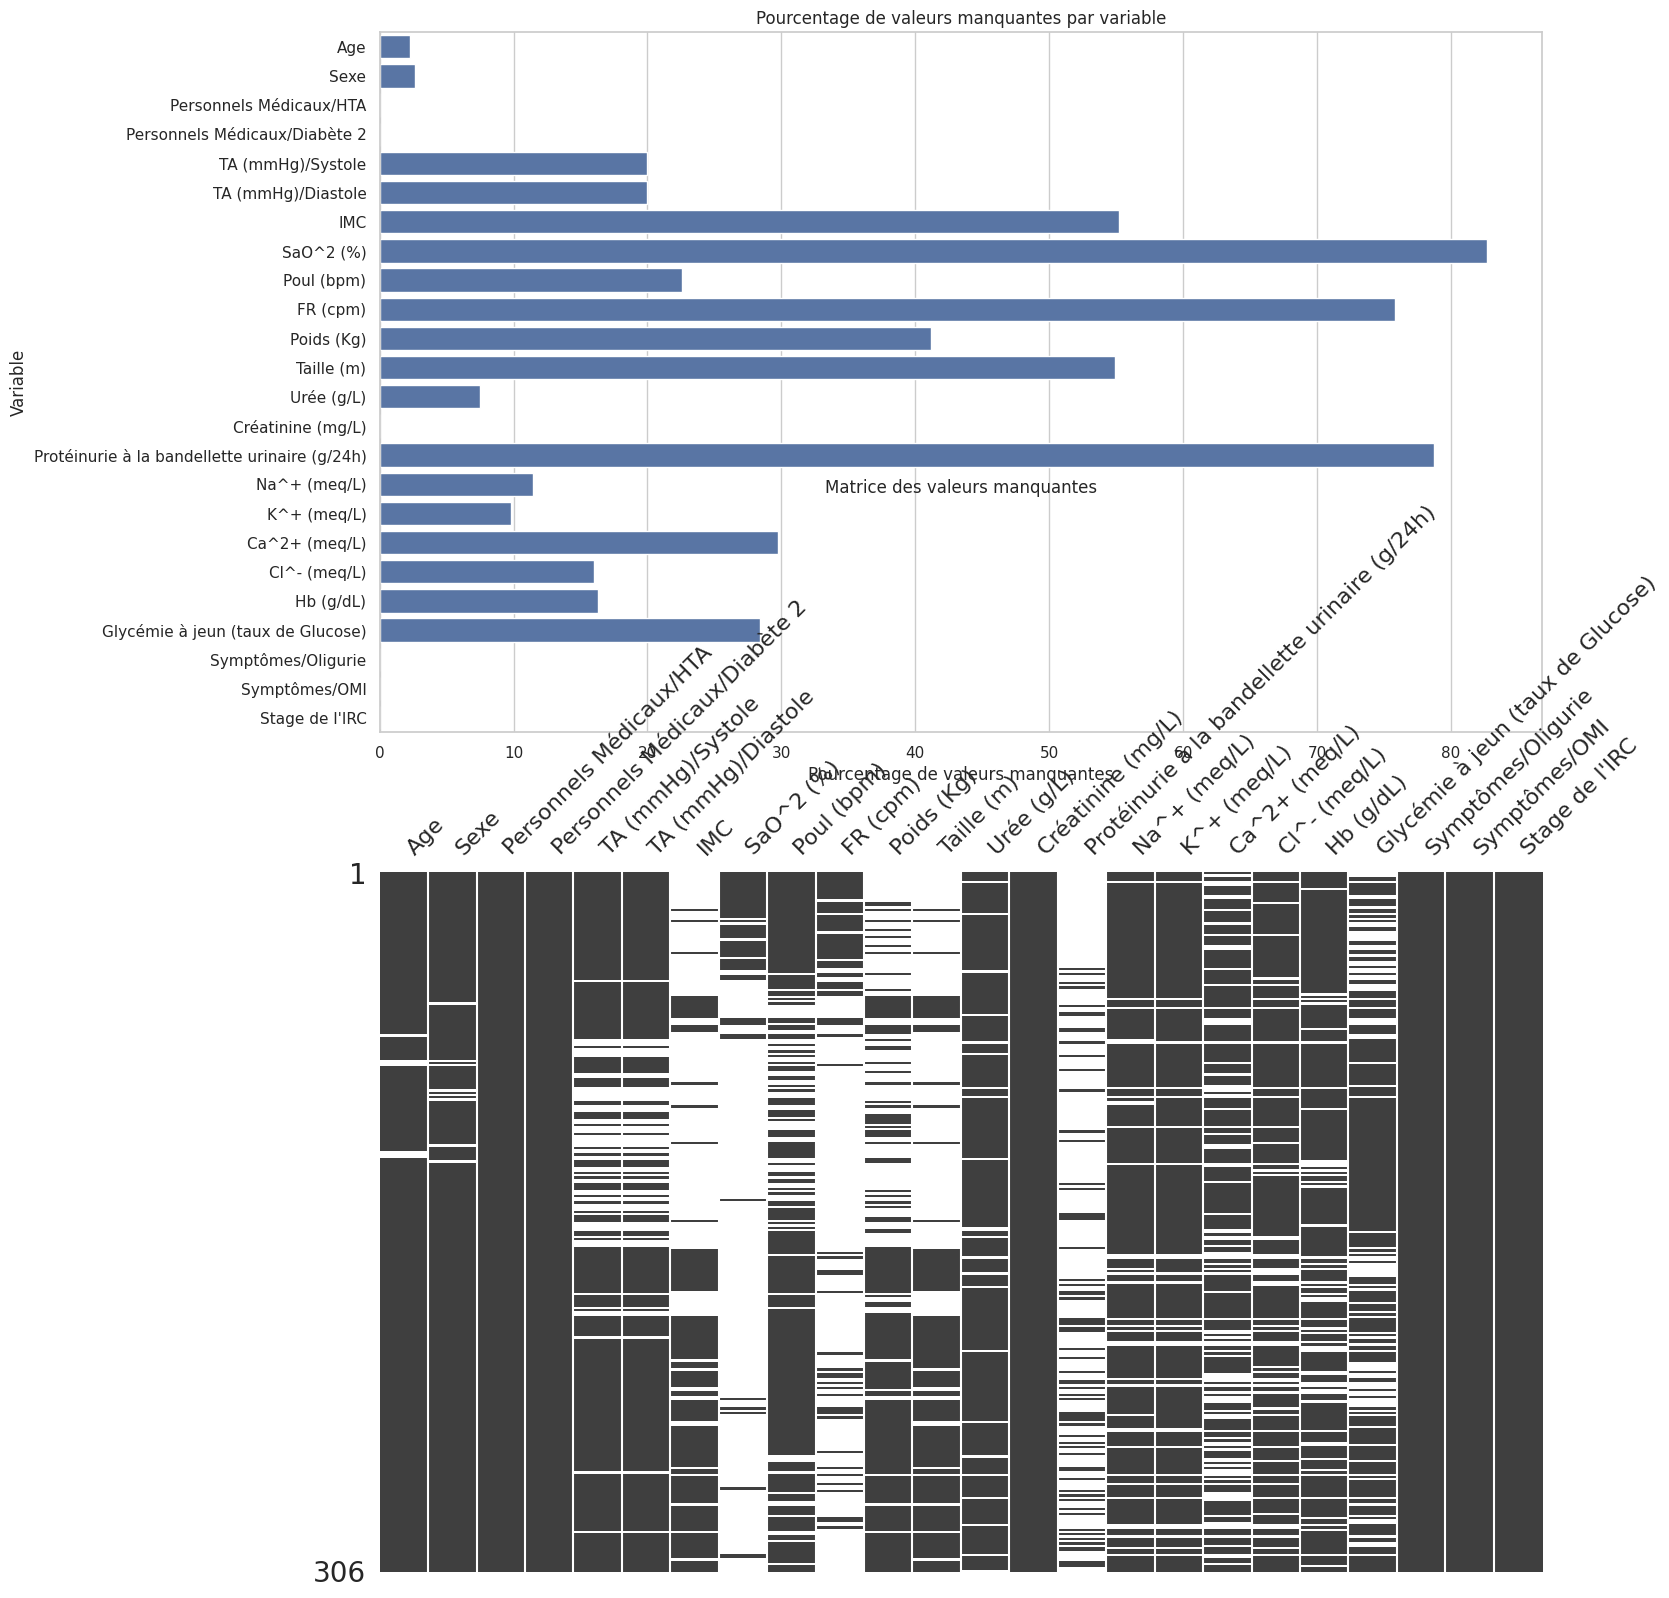


Colonnes avec >30% de valeurs manquantes:
                                         Variable  Pourcentage NA
7                                       SaO^2 (%)       82.679739
14  Protéinurie à la bandellette urinaire (g/24h)       78.758170
9                                        FR (cpm)       75.816993
6                                             IMC       55.228758
11                                     Taille (m)       54.901961
10                                     Poids (Kg)       41.176471


In [504]:
analyzer.analyze_missing_values()

In [505]:
analyzer.impute_missing_values(cols=['Age','Sexe'], strategy='mean')


Imputation effectuée sur la colonne: Age (Stratégie: mean)

Imputation effectuée sur la colonne: Sexe (Stratégie: mean)


In [506]:
def impute_bmi_weight_height(analyzer):
    """
    Impute les valeurs manquantes entre IMC, poids et taille en utilisant leurs relations.
    IMC = Poids (kg) / Taille² (m²)
    """
    df = analyzer.df

    # Calculer l'IMC pour les lignes où il est manquant mais poids et taille sont disponibles
    mask_imc = df['IMC'].isna() & df['Poids (Kg)'].notna() & df['Taille (m)'].notna()
    if mask_imc.sum() > 0:
        df.loc[mask_imc, 'IMC'] = df.loc[mask_imc, 'Poids (Kg)'] / (df.loc[mask_imc, 'Taille (m)'] ** 2)
        print(f"IMC calculé pour {mask_imc.sum()} patients à partir du poids et de la taille")

    # Calculer le poids pour les lignes où il est manquant mais IMC et taille sont disponibles
    mask_poids = df['Poids (Kg)'].isna() & df['IMC'].notna() & df['Taille (m)'].notna()
    if mask_poids.sum() > 0:
        df.loc[mask_poids, 'Poids (Kg)'] = df.loc[mask_poids, 'IMC'] * (df.loc[mask_poids, 'Taille (m)'] ** 2)
        print(f"Poids calculé pour {mask_poids.sum()} patients à partir de l'IMC et de la taille")

    # Calculer la taille pour les lignes où elle est manquante mais IMC et poids sont disponibles
    mask_taille = df['Taille (m)'].isna() & df['IMC'].notna() & df['Poids (Kg)'].notna()
    if mask_taille.sum() > 0:
        df.loc[mask_taille, 'Taille (m)'] = np.sqrt(df.loc[mask_taille, 'Poids (Kg)'] / df.loc[mask_taille, 'IMC'])
        print(f"Taille calculée pour {mask_taille.sum()} patients à partir du poids et de l'IMC")

    # Afficher le nombre de valeurs manquantes restantes
    print("\nValeurs manquantes restantes après calculs:")
    print(f"IMC: {df['IMC'].isna().sum()}")
    print(f"Poids: {df['Poids (Kg)'].isna().sum()}")
    print(f"Taille: {df['Taille (m)'].isna().sum()}")

    return df

# Appliquer l'imputation pour IMC, poids et taille
analyzer.df = impute_bmi_weight_height(analyzer)


Valeurs manquantes restantes après calculs:
IMC: 169
Poids: 126
Taille: 168


In [507]:
def impute_blood_pressure(analyzer):
    """
    Impute les valeurs manquantes entre pression systolique et diastolique en utilisant leur relation.
    Typiquement, le rapport systolique/diastolique suit certaines tendances.
    """
    df = analyzer.df

    # Calculer le rapport moyen systole/diastole pour les patients ayant les deux mesures
    mask_both = df['TA (mmHg)/Systole'].notna() & df['TA (mmHg)/Diastole'].notna()

    if mask_both.sum() > 0:
        # Calculer le rapport moyen (on utilise la médiane pour être plus robuste aux outliers)
        systole_diastole_ratio = df.loc[mask_both, 'TA (mmHg)/Systole'] / df.loc[mask_both, 'TA (mmHg)/Diastole']
        median_ratio = systole_diastole_ratio.median()

        # Imputer la systole à partir de la diastole
        mask_sys = df['TA (mmHg)/Systole'].isna() & df['TA (mmHg)/Diastole'].notna()
        if mask_sys.sum() > 0:
            df.loc[mask_sys, 'TA (mmHg)/Systole'] = df.loc[mask_sys, 'TA (mmHg)/Diastole'] * median_ratio
            print(f"Pression systolique calculée pour {mask_sys.sum()} patients à partir de la diastolique")
            print(f"Ratio médian systole/diastole utilisé: {median_ratio:.2f}")

        # Imputer la diastole à partir de la systole
        mask_dia = df['TA (mmHg)/Diastole'].isna() & df['TA (mmHg)/Systole'].notna()
        if mask_dia.sum() > 0:
            df.loc[mask_dia, 'TA (mmHg)/Diastole'] = df.loc[mask_dia, 'TA (mmHg)/Systole'] / median_ratio
            print(f"Pression diastolique calculée pour {mask_dia.sum()} patients à partir de la systolique")

    # Afficher le nombre de valeurs manquantes restantes
    print("\nValeurs manquantes restantes après imputation de la pression artérielle:")
    print(f"Systole: {df['TA (mmHg)/Systole'].isna().sum()}")
    print(f"Diastole: {df['TA (mmHg)/Diastole'].isna().sum()}")

    return df

# Appliquer l'imputation pour les pressions artérielles
analyzer.df = impute_blood_pressure(analyzer)


Valeurs manquantes restantes après imputation de la pression artérielle:
Systole: 61
Diastole: 61


In [508]:
analyzer.numeric_cols

['Age',
 'Personnels Médicaux/HTA',
 'Personnels Médicaux/Diabète 2',
 'TA (mmHg)/Systole',
 'TA (mmHg)/Diastole',
 'SaO^2 (%)',
 'Poul (bpm)',
 'FR (cpm)',
 'Poids (Kg)',
 'Taille (m)',
 'Urée (g/L)',
 'Créatinine (mg/L)',
 'Protéinurie à la bandellette urinaire (g/24h)',
 'Na^+ (meq/L)',
 'K^+ (meq/L)',
 'Ca^2+ (meq/L)',
 'Cl^- (meq/L)',
 'Hb (g/dL)',
 'Glycémie à jeun (taux de Glucose)',
 'Symptômes/Oligurie']

In [509]:
def impute_clinical_values_limited(analyzer, threshold=25):
    """
    Impute les valeurs manquantes avec des valeurs médicalement cohérentes,
    uniquement pour les colonnes ayant moins de {threshold}% de valeurs manquantes.
    """
    df = analyzer.df

    # Calculer le pourcentage de valeurs manquantes par colonne
    missing_pct = (df.isnull().sum() / len(df)) * 100

    # Identifier les colonnes à imputer (< threshold% de valeurs manquantes)
    cols_to_impute = missing_pct[missing_pct < threshold].index.tolist()
    cols_to_skip = missing_pct[missing_pct >= threshold].index.tolist()

    print(f"\nColonnes avec ≥{threshold}% de valeurs manquantes (à ignorer):")
    for col in cols_to_skip:
        print(f"- {col}: {missing_pct[col]:.1f}%")

    print(f"\nColonnes avec <{threshold}% de valeurs manquantes (à imputer):")
    for col in cols_to_impute:
        if df[col].isnull().sum() > 0:  # Seulement si contient des NA
            print(f"- {col}: {missing_pct[col]:.1f}%")

    # Continuer uniquement avec les colonnes à imputer qui contiennent des valeurs manquantes
    cols_to_impute = [col for col in cols_to_impute if df[col].isnull().sum() > 0]

    # Si aucune colonne à imputer, sortir
    if not cols_to_impute:
        print("Aucune colonne ne nécessite d'imputation selon les critères spécifiés.")
        return df

    # Créer des groupes pour l'imputation
    if 'Age' in df.columns and df['Age'].notna().sum() > 0:
        df['Groupe_Age'] = pd.cut(df['Age'], bins=[0, 40, 60, 100], labels=['Jeune', 'Moyen', 'Âgé'])

    # Imputation pour chaque colonne selon sa nature
    for col in cols_to_impute:
        # Vérifier si c'est une colonne numérique
        if col in analyzer.numeric_cols:
            # Stratégies spécifiques selon le type de colonne
            if col in ['TA (mmHg)/Systole', 'TA (mmHg)/Diastole']:
                # Imputation basée sur l'âge, le sexe et HTA
                if 'Groupe_Age' in df.columns and 'Sexe' in df.columns and 'Personnels Médicaux/HTA' in df.columns:
                    grp_medians = df.groupby(['Groupe_Age', 'Personnels Médicaux/HTA', 'Sexe'])[col].median()
                    for (age_grp, hta, sexe), median_val in grp_medians.items():
                        mask = (df['Groupe_Age'] == age_grp) & (df['Personnels Médicaux/HTA'] == hta) & \
                               (df['Sexe'] == sexe) & df[col].isna()
                        if not pd.isna(median_val) and mask.sum() > 0:
                            df.loc[mask, col] = median_val
                            print(f"Imputé {col} pour {mask.sum()} patients du groupe {age_grp}/HTA={hta}/Sexe={sexe} avec {median_val:.1f}")

            elif col in ['Na^+ (meq/L)', 'K^+ (meq/L)', 'Ca^2+ (meq/L)', 'Cl^- (meq/L)']:
                # Imputation des électrolytes basée sur la fonction rénale
                if 'Créatinine (mg/L)' in df.columns:
                    df['IR_status'] = pd.cut(df['Créatinine (mg/L)'],
                                           bins=[0, 12, 20, 1000],
                                           labels=['Normal', 'IR_modérée', 'IR_sévère'])

                    grp_medians = df.groupby('IR_status')[col].median()
                    for ir_status, median_val in grp_medians.items():
                        mask = (df['IR_status'] == ir_status) & df[col].isna()
                        if not pd.isna(median_val) and mask.sum() > 0:
                            df.loc[mask, col] = median_val
                            print(f"Imputé {col} pour {mask.sum()} patients avec {ir_status} à {median_val:.1f}")

            elif col == 'Hb (g/dL)':
                # Imputation de l'hémoglobine basée sur le sexe
                if 'Sexe' in df.columns:
                    male_median = df[df['Sexe'] == 1]['Hb (g/dL)'].median()
                    female_median = df[df['Sexe'] == 0]['Hb (g/dL)'].median()

                    if not pd.isna(male_median):
                        mask_male = (df['Sexe'] == 1) & df['Hb (g/dL)'].isna()
                        df.loc[mask_male, 'Hb (g/dL)'] = male_median
                        print(f"Imputé Hb pour {mask_male.sum()} hommes avec {male_median:.1f} g/dL")

                    if not pd.isna(female_median):
                        mask_female = (df['Sexe'] == 0) & df['Hb (g/dL)'].isna()
                        df.loc[mask_female, 'Hb (g/dL)'] = female_median
                        print(f"Imputé Hb pour {mask_female.sum()} femmes avec {female_median:.1f} g/dL")

            elif col == 'Glycémie à jeun (taux de Glucose)':
                # Imputation de la glycémie basée sur le diabète
                if 'Personnels Médicaux/Diabète 2' in df.columns:
                    diab_median = df[df['Personnels Médicaux/Diabète 2'] == 1]['Glycémie à jeun (taux de Glucose)'].median()
                    non_diab_median = df[df['Personnels Médicaux/Diabète 2'] == 0]['Glycémie à jeun (taux de Glucose)'].median()

                    if not pd.isna(diab_median):
                        mask_diab = (df['Personnels Médicaux/Diabète 2'] == 1) & df['Glycémie à jeun (taux de Glucose)'].isna()
                        df.loc[mask_diab, 'Glycémie à jeun (taux de Glucose)'] = diab_median
                        print(f"Imputé glycémie pour {mask_diab.sum()} diabétiques avec {diab_median:.1f} g/L")

                    if not pd.isna(non_diab_median):
                        mask_non_diab = (df['Personnels Médicaux/Diabète 2'] == 0) & df['Glycémie à jeun (taux de Glucose)'].isna()
                        df.loc[mask_non_diab, 'Glycémie à jeun (taux de Glucose)'] = non_diab_median
                        print(f"Imputé glycémie pour {mask_non_diab.sum()} non-diabétiques avec {non_diab_median:.1f} g/L")

            elif col == 'Urée (g/L)' and 'Créatinine (mg/L)' in df.columns:
                # Imputation de l'urée basée sur la créatinine
                from sklearn.linear_model import LinearRegression

                mask_both_present = df['Urée (g/L)'].notna() & df['Créatinine (mg/L)'].notna()
                X_train = df.loc[mask_both_present, 'Créatinine (mg/L)'].values.reshape(-1, 1)
                y_train = df.loc[mask_both_present, 'Urée (g/L)'].values

                if len(X_train) > 0:
                    model = LinearRegression()
                    model.fit(X_train, y_train)

                    mask_predict = df['Urée (g/L)'].isna() & df['Créatinine (mg/L)'].notna()
                    X_predict = df.loc[mask_predict, 'Créatinine (mg/L)'].values.reshape(-1, 1)

                    if len(X_predict) > 0:
                        predictions = model.predict(X_predict)
                        df.loc[mask_predict, 'Urée (g/L)'] = predictions
                        print(f"Imputé urée pour {mask_predict.sum()} patients en utilisant la régression sur la créatinine")

            else:
                # Pour les autres colonnes numériques, imputation par la médiane du groupe d'âge
                if 'Groupe_Age' in df.columns:
                    grp_medians = df.groupby('Groupe_Age')[col].median()

                    for age_grp, median_val in grp_medians.items():
                        mask = (df['Groupe_Age'] == age_grp) & df[col].isna()
                        if not pd.isna(median_val) and mask.sum() > 0:
                            df.loc[mask, col] = median_val
                            print(f"Imputé {col} pour {mask.sum()} patients du groupe {age_grp} avec {median_val:.2f}")

    # Supprimer les colonnes temporaires de groupement
    if 'Groupe_Age' in df.columns:
        df.drop('Groupe_Age', axis=1, inplace=True)
    if 'IR_status' in df.columns:
        df.drop('IR_status', axis=1, inplace=True)

    return df

# Appliquer l'imputation clinique limitée
analyzer.df = impute_clinical_values_limited(analyzer, threshold=25)

# Vérifier les résultats
print("\nRésumé des valeurs manquantes après imputation:")
print(analyzer.df.isnull().sum())

# Afficher les pourcentages de valeurs manquantes restantes
missing_pct = (analyzer.df.isnull().sum() / len(analyzer.df)) * 100
print("\nPourcentage de valeurs manquantes restantes:")
for col in analyzer.df.columns:
    if missing_pct[col] > 0:
        print(f"{col}: {missing_pct[col]:.1f}%")


Colonnes avec ≥25% de valeurs manquantes (à ignorer):
- IMC: 55.2%
- SaO^2 (%): 82.7%
- FR (cpm): 75.8%
- Poids (Kg): 41.2%
- Taille (m): 54.9%
- Protéinurie à la bandellette urinaire (g/24h): 78.8%
- Ca^2+ (meq/L): 29.7%
- Glycémie à jeun (taux de Glucose): 28.4%

Colonnes avec <25% de valeurs manquantes (à imputer):
- TA (mmHg)/Systole: 19.9%
- TA (mmHg)/Diastole: 19.9%
- Poul (bpm): 22.5%
- Urée (g/L): 7.5%
- Na^+ (meq/L): 11.4%
- K^+ (meq/L): 9.8%
- Cl^- (meq/L): 16.0%
- Hb (g/dL): 16.3%
Imputé TA (mmHg)/Systole pour 2 patients du groupe Jeune/HTA=0/Sexe=0.0 avec 135.5
Imputé TA (mmHg)/Systole pour 2 patients du groupe Jeune/HTA=0/Sexe=1.0 avec 139.0
Imputé TA (mmHg)/Systole pour 2 patients du groupe Jeune/HTA=1/Sexe=0.0 avec 133.0
Imputé TA (mmHg)/Systole pour 1 patients du groupe Jeune/HTA=1/Sexe=1.0 avec 150.0
Imputé TA (mmHg)/Systole pour 1 patients du groupe Moyen/HTA=0/Sexe=0.0 avec 129.0
Imputé TA (mmHg)/Systole pour 6 patients du groupe Moyen/HTA=0/Sexe=1.0 avec 134.5
Impu

In [510]:
clean_df = analyzer.df.drop(columns=['IMC',
'SaO^2 (%)',
'FR (cpm)',
'Poids (Kg)',
'Taille (m)',
'Protéinurie à la bandellette urinaire (g/24h)',
'Ca^2+ (meq/L)',
'Glycémie à jeun (taux de Glucose)'])

In [511]:
clean_analyzer = MedicalDataAnalyzer(clean_df)

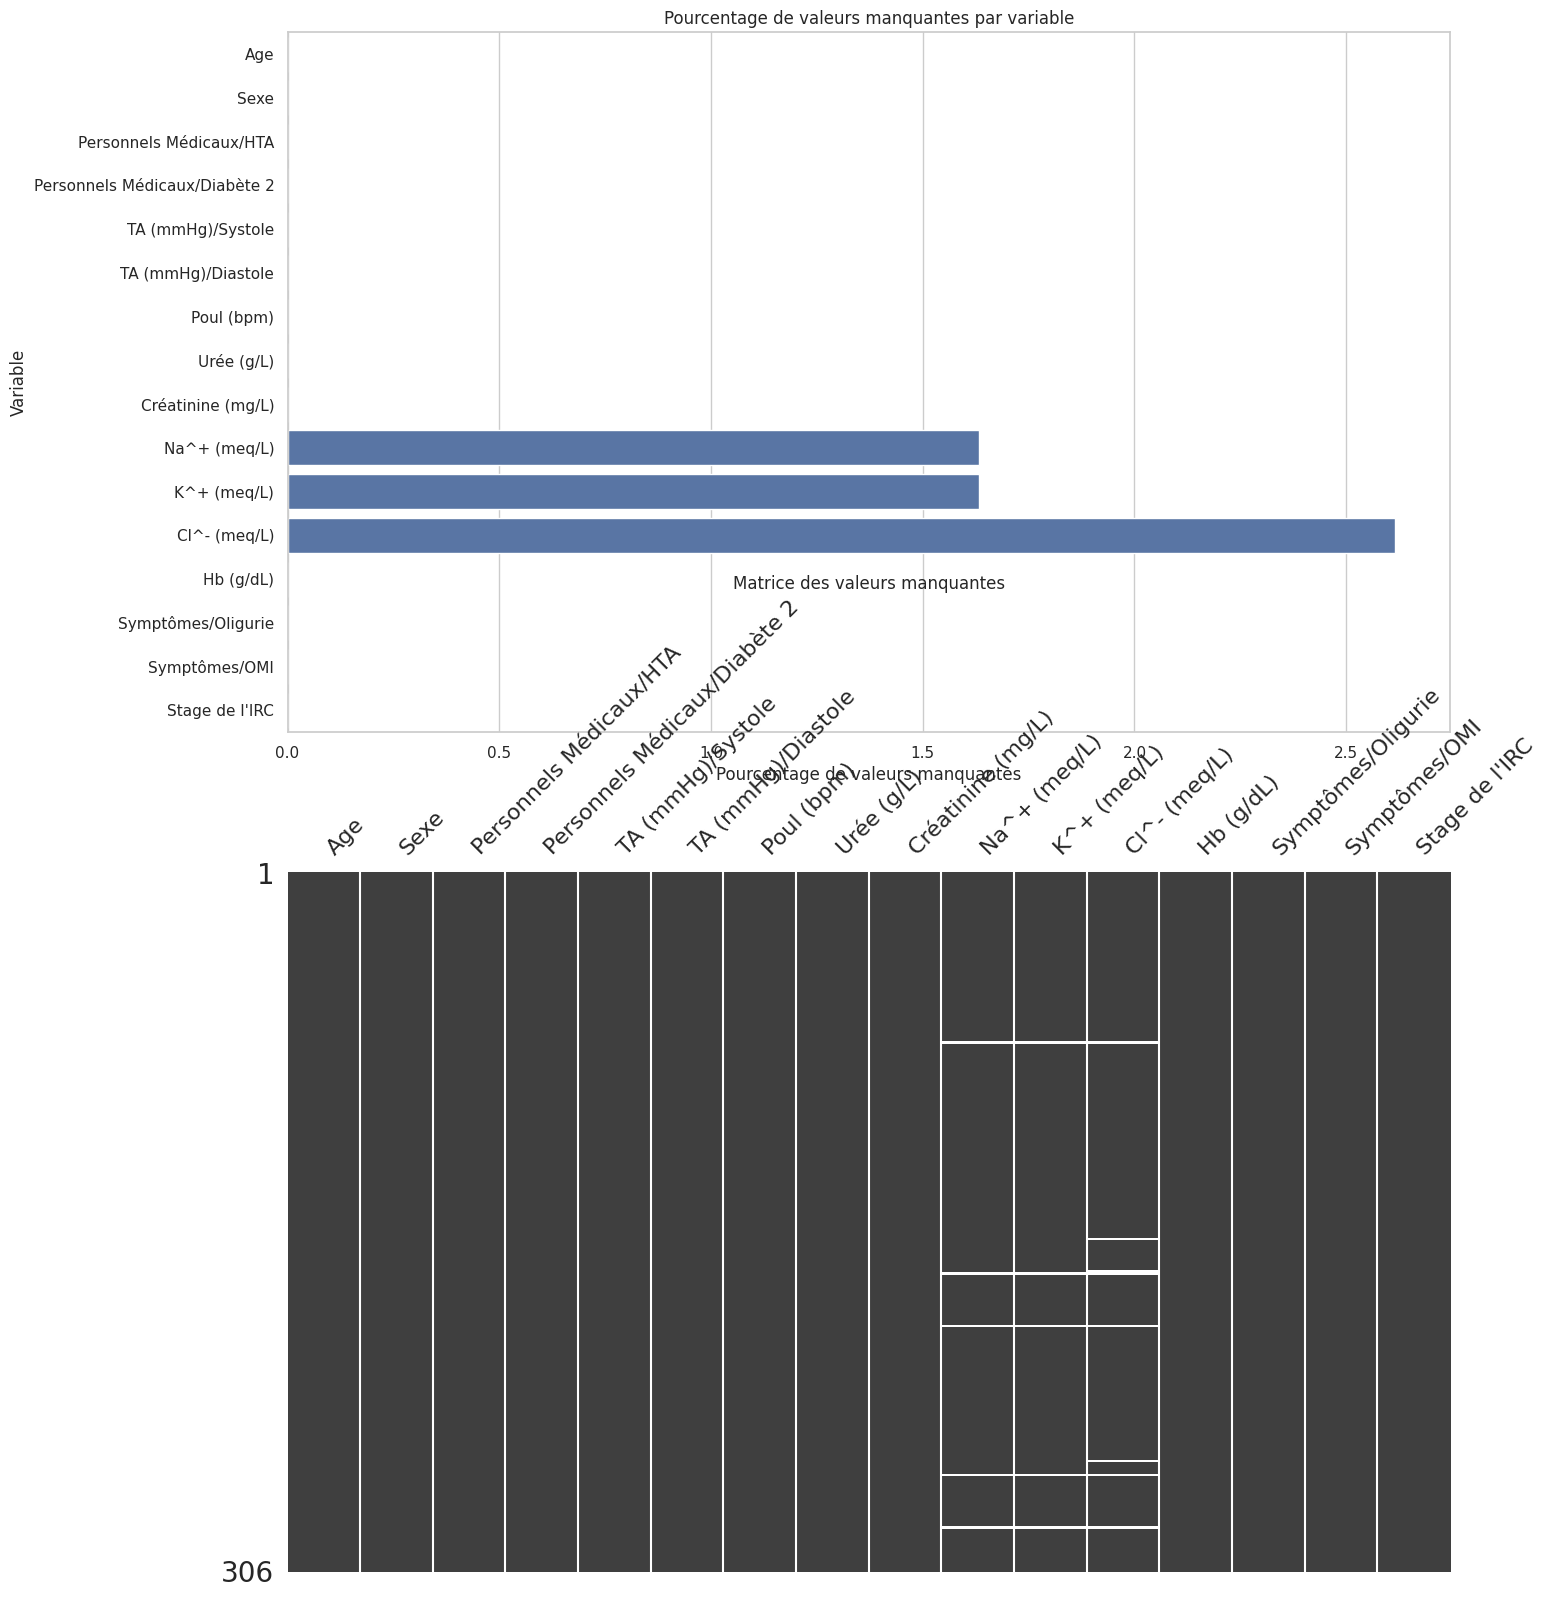


Colonnes avec >30% de valeurs manquantes:
Empty DataFrame
Columns: [Variable, Pourcentage NA]
Index: []


In [512]:
clean_analyzer.analyze_missing_values()

In [513]:
clean_analyzer.df.dropna(inplace=True)

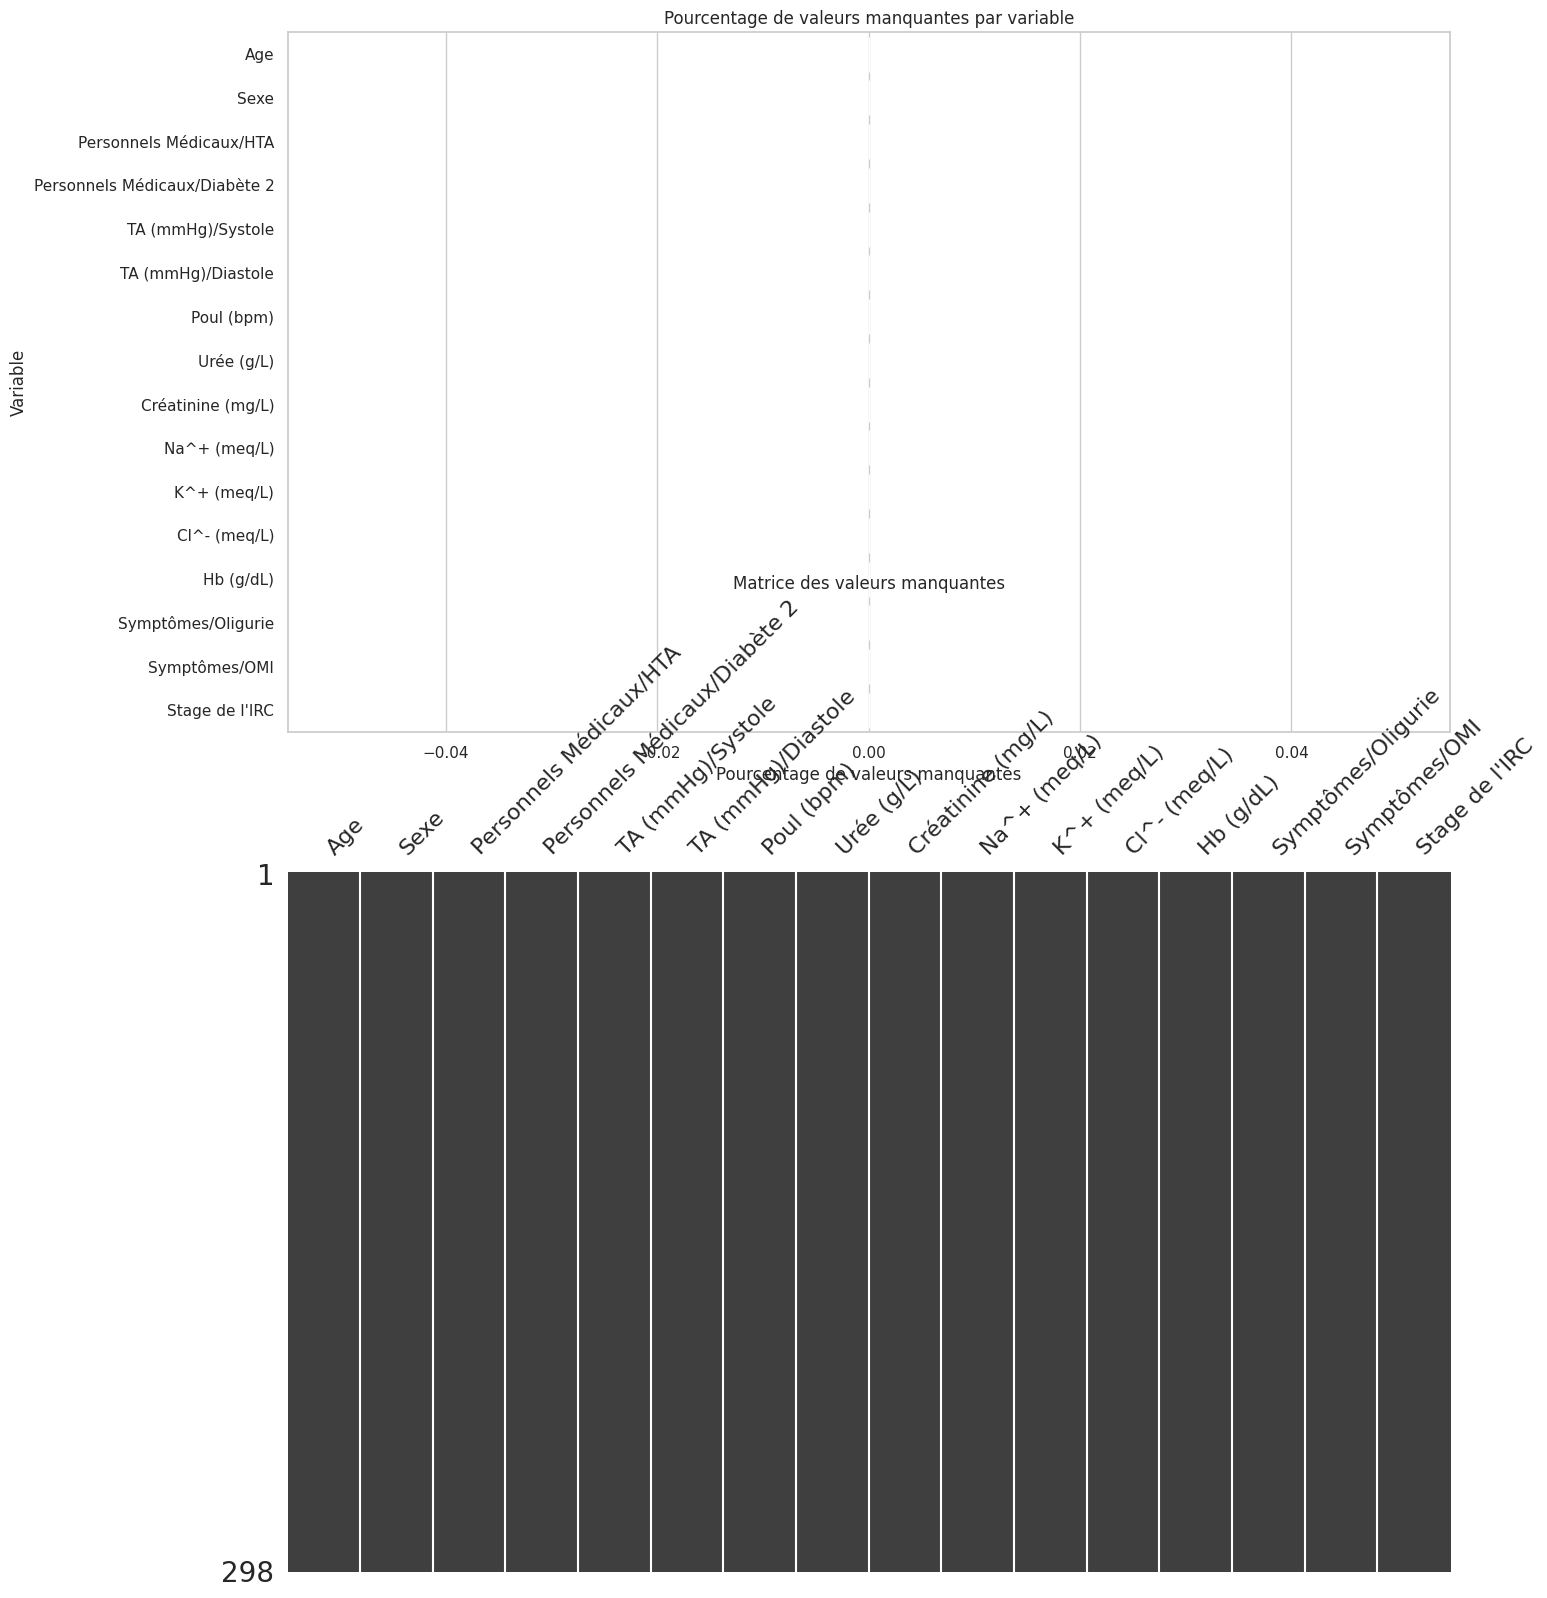


Colonnes avec >30% de valeurs manquantes:
Empty DataFrame
Columns: [Variable, Pourcentage NA]
Index: []


In [514]:
clean_analyzer.analyze_missing_values()

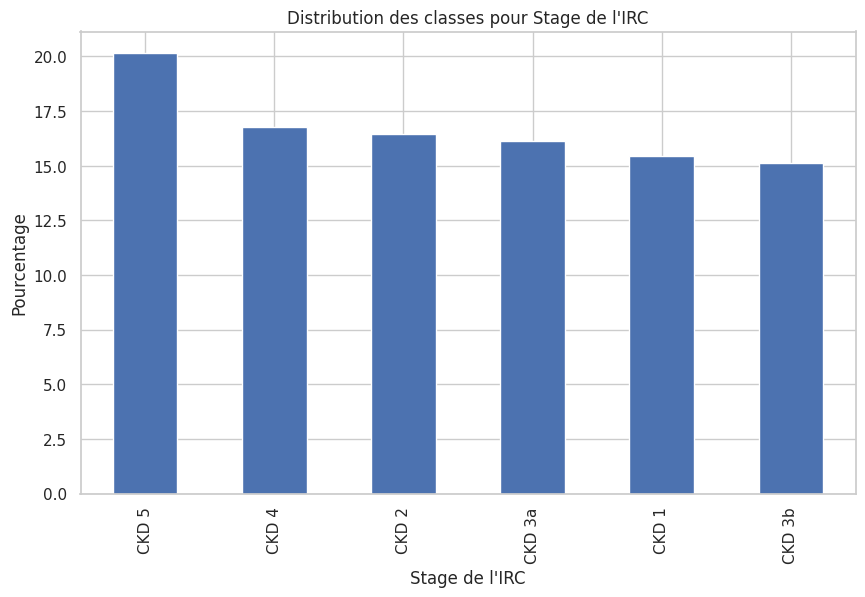


Distribution des classes:
Stage de l'IRC
CKD 5     20.134228
CKD 4     16.778523
CKD 2     16.442953
CKD 3a    16.107383
CKD 1     15.436242
CKD 3b    15.100671
Name: proportion, dtype: float64


In [515]:
clean_analyzer.analyze_class_balance("Stage de l'IRC")

In [533]:
clean_analyzer.df['Stage de l\'IRC'].value_counts().to_dict()

{'CKD 5': 60,
 'CKD 4': 50,
 'CKD 2': 49,
 'CKD 3a': 48,
 'CKD 1': 46,
 'CKD 3b': 45}

In [517]:
from collections import Counter
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

# Load your cleaned data
X = clean_analyzer.df.drop(["Stage de l'IRC"], axis=1)
y = clean_analyzer.df["Stage de l'IRC"]


In [518]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [519]:

# Custom sampling strategy for 65 samples per class
original_counts = dict(Counter(y))
sampling_strategy = {cls: 65 for cls in np.unique(y)}  # Force 65 samples per class

# Create pipeline with flexible classifier step
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('oversampler', RandomOverSampler(
        sampling_strategy=sampling_strategy,
        random_state=42
    )),
    ('classifier', None)  # Placeholder for grid search
])

# Broad parameter grid covering multiple classifiers
param_grid = [
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10],
        'classifier__class_weight': ['balanced', None]
    },
    {
        'classifier': [BalancedRandomForestClassifier()],  # <-- Replacement
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10],
        'classifier__sampling_strategy': ['auto', 'all'],
        'classifier__replacement': [True, False]
    },
    {
        'classifier': [GradientBoostingClassifier()],
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 5]
    }
]




In [520]:

# Custom scoring for multi-class imbalance
scoring = {
    'f1_macro': 'f1_macro',
    'balanced_accuracy': 'balanced_accuracy'
}

# Configure grid search with nested cross-validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1_macro',
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=3
)


In [521]:
# Execute grid search
grid_search.fit(X_train, y_train)

# Best model evaluation
print("\nBest parameters:", grid_search.best_params_)
print("Best F1 macro:", grid_search.best_score_)


Fitting 3 folds for each of 62 candidates, totalling 186 fits

Best parameters: {'classifier': RandomForestClassifier(), 'classifier__class_weight': None, 'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Best F1 macro: 0.5950542195662702


In [522]:
X_resampled, y_resampled = grid_search.best_estimator_.named_steps['oversampler'].fit_resample(X, y)
print("\nResampled class distribution:", Counter(y_resampled))


Resampled class distribution: Counter({'CKD 5': 65, 'CKD 2': 65, 'CKD 4': 65, 'CKD 3a': 65, 'CKD 1': 65, 'CKD 3b': 65})


In [523]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import pandas as pd

# Fonction pour calculer ROC AUC multiclasse
def multiclass_roc_auc(y_true, y_pred, average="ovo"):
    lb = LabelBinarizer()
    lb.fit(y_true)
    y_true_bin = lb.transform(y_true)
    y_pred_bin = lb.transform(y_pred)
    return roc_auc_score(y_true_bin, y_pred_bin, multi_class=average)

In [524]:
cv_results = pd.DataFrame(grid_search.cv_results_)

metrics = []
for idx in range(len(cv_results)):
    model = grid_search.best_estimator_.set_params(**cv_results.iloc[idx]['params'])
    model.fit(X_train, y_train)
    # Get predictions directly from CV storage
    y_pred = model.predict(X_test)

    # Calculate metrics
    model_metrics = {
        'Model': str(model.named_steps['classifier'].__class__.__name__),
        'Params': cv_results.iloc[idx]['params'],
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'Test F1 Macro': f1_score(y_test, y_pred, average='macro'),
        'Test Precision Macro': precision_score(y_test, y_pred, average='macro'),
        'Test Recall Macro': recall_score(y_test, y_pred, average='macro'),
        'ROC AUC OvO': multiclass_roc_auc(y_test, y_pred)
    }
    metrics.append(model_metrics)

results_df = pd.DataFrame(metrics)


In [525]:
import joblib
joblib.dump(grid_search.best_estimator_, 'best_pipeline.pkl')

['best_pipeline.pkl']

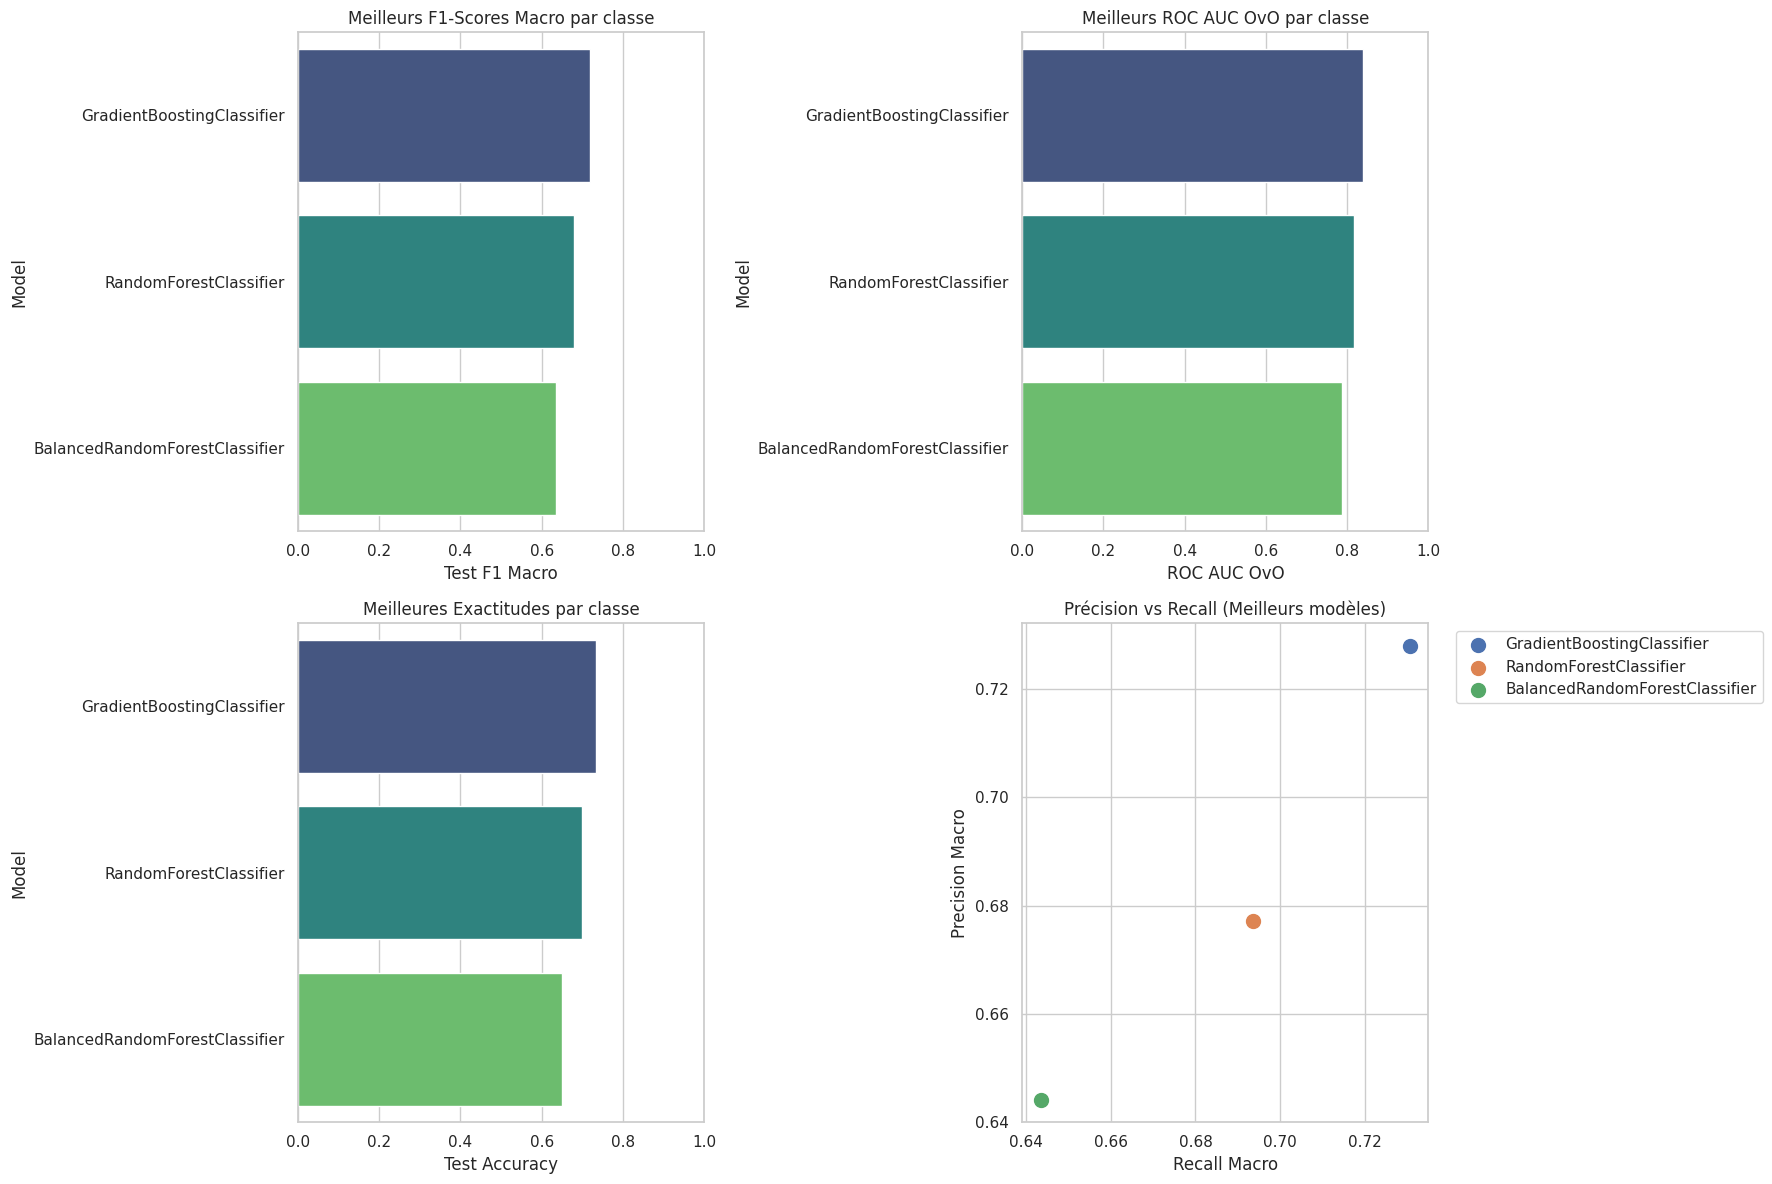


Top modèles par classe :


,Model,Params,Test Accuracy,Test F1 Macro,Test Precision Macro,Test Recall Macro,ROC AUC OvO
60,GradientBoostingClassifier,"{'classifier': GradientBoostingClassifier(max_depth=5), 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 50}",0.733,0.718,0.728,0.731,0.839
6,RandomForestClassifier,"{'classifier': RandomForestClassifier(max_depth=10, n_estimators=200), 'classifier__class_weight': 'balanced', 'classifier__max_depth': 10, 'classifier__n_estimators': 50}",0.700,0.679,0.677,0.694,0.817
35,BalancedRandomForestClassifier,"{'classifier': BalancedRandomForestClassifier(max_depth=10, n_estimators=200, replacement=False), 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'classifier__replacement': True, 'classifier__sampling_strategy': 'all'}",0.650,0.634,0.644,0.644,0.787


In [526]:
# Garder uniquement le meilleur modèle de chaque catégorie
top_models_df = results_df.sort_values('Test F1 Macro', ascending=False)\
                          .groupby('Model').head(1)\
                          .sort_values('Test F1 Macro', ascending=False)

# Visualisation comparative des meilleurs modèles
plt.figure(figsize=(18, 12))
sns.set_theme(style="whitegrid")

# 1. Barplot des F1-scores
plt.subplot(2, 2, 1)
sns.barplot(data=top_models_df, x='Test F1 Macro', y='Model', palette='viridis')
plt.title('Meilleurs F1-Scores Macro par classe')
plt.xlim(0, 1)

# 2. Barplot des ROC AUC
plt.subplot(2, 2, 2)
sns.barplot(data=top_models_df, x='ROC AUC OvO', y='Model', palette='viridis')
plt.title('Meilleurs ROC AUC OvO par classe')
plt.xlim(0, 1)

# 3. Barplot de l'accuracy globale
plt.subplot(2, 2, 3)
sns.barplot(data=top_models_df, x='Test Accuracy', y='Model', palette='viridis')
plt.title('Meilleures Exactitudes par classe')
plt.xlim(0, 1)

# 4. Courbe de précision-rappel
plt.subplot(2, 2, 4)
for model in top_models_df.Model:
    model_data = top_models_df[top_models_df.Model == model]
    plt.scatter(model_data['Test Recall Macro'],
                model_data['Test Precision Macro'],
                s=100, label=model)
plt.xlabel('Recall Macro')
plt.ylabel('Precision Macro')
plt.title('Précision vs Recall (Meilleurs modèles)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Affichage des résultats
print("\n\033[1mTop modèles par classe :\033[0m")
display(top_models_df.style
        .background_gradient(cmap='viridis', subset=['Test F1 Macro', 'ROC AUC OvO', 'Test Accuracy'])
        .format("{:.3f}", subset=['Test Accuracy',
        'Test F1 Macro', 'Test Precision Macro',
        'Test Recall Macro', 'ROC AUC OvO']))

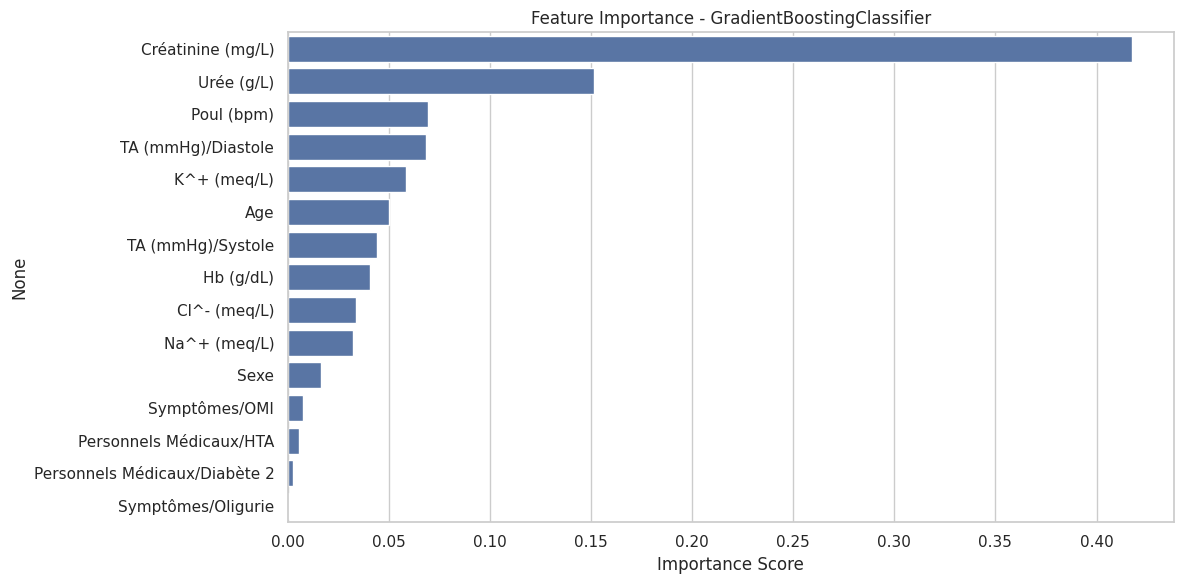

SHAP analysis skipped - model not tree-based


In [527]:
loaded_pipeline = joblib.load('/content/best_pipeline.pkl')

best_model = loaded_pipeline.named_steps['classifier']
scaler = loaded_pipeline.named_steps['scaler']


selected_variables = X.columns  # Get feature names

# Plot feature importance if available
if hasattr(best_model, 'feature_importances_'):
    plt.figure(figsize=(12, 6))
    feature_importance = pd.Series(
        best_model.feature_importances_,
        index=selected_variables
    ).sort_values(ascending=False)

    sns.barplot(x=feature_importance.values, y=feature_importance.index)
    plt.title(f'Feature Importance - {type(best_model).__name__}')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

# SHAP analysis for tree-based models
import shap

if 'tree' in str(best_model).lower():  # Check if tree-based model
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)

    # Summary plot
    plt.figure(figsize=(12, 6))
    shap.summary_plot(shap_values, X_test, plot_type="bar",
                      feature_names=selected_variables,
                      class_names=y.unique().astype(str))
    plt.title(f'SHAP Feature Importance - {type(best_model).__name__}')
    plt.tight_layout()
    plt.show()

    # Detailed SHAP summary
    plt.figure(figsize=(12, 6))
    shap.summary_plot(shap_values, X_test, feature_names=selected_variables)
    plt.title(f'SHAP Value Distribution - {type(best_model).__name__}')
    plt.tight_layout()
    plt.show()
else:
    print("SHAP analysis skipped - model not tree-based")

In [532]:
feature_importance.to_dict()

{'Créatinine (mg/L)': 0.41742507047203536,
 'Urée (g/L)': 0.1515312703229194,
 'Poul (bpm)': 0.0695376740074486,
 'TA (mmHg)/Diastole': 0.06856742809137871,
 'K^+ (meq/L)': 0.05836495976620055,
 'Age': 0.050292845662443464,
 'TA (mmHg)/Systole': 0.04405733441069815,
 'Hb (g/dL)': 0.040854459659456076,
 'Cl^- (meq/L)': 0.033660477984002075,
 'Na^+ (meq/L)': 0.03225292846988775,
 'Sexe': 0.016711032795909006,
 'Symptômes/OMI': 0.007844174628121434,
 'Personnels Médicaux/HTA': 0.005690856455714856,
 'Personnels Médicaux/Diabète 2': 0.002624954746330347,
 'Symptômes/Oligurie': 0.0005845325274541617}

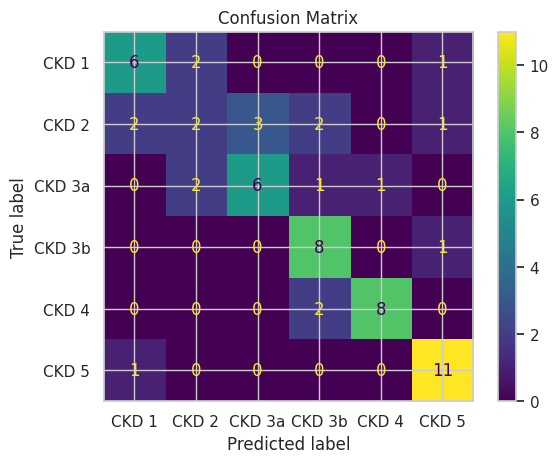

In [534]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

scaled_data = scaler.transform(X_test)
y_pred = best_model.predict(scaled_data)


# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=loaded_pipeline.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()
